In [1]:
import torch
from pytorch3d.renderer import FoVOrthographicCameras
from pytorch3d.io import load_objs_as_meshes

In [2]:
device = torch.device("cuda")
meshes = load_objs_as_meshes(["data/meshes/mixamo-human.obj"], device=device)

/home/jorge/miniconda3/envs/thesis4/lib/python3.9/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


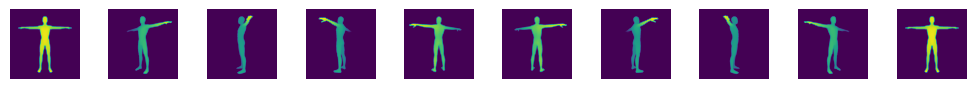

In [4]:
from text3d2video.ipython_utils import display_ims
from text3d2video.rendering import render_depth_map
from text3d2video.util import turntable_cameras

cameras = turntable_cameras(2, 10)
frames = meshes.extend(len(cameras))
depth_maps = render_depth_map(frames, cameras)

display_ims(depth_maps)

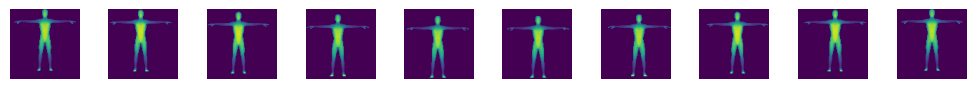

In [27]:
from torch import Tensor

N = 10

angles = np.linspace(0, 2 * np.pi, N)
dist = 2
radius = 0.1

circle = Tensor([[radius * np.sin(angle), radius * np.cos(angle)] for angle in angles])

r = torch.eye(3)
r[0, 0] = -1
r[2, 2] = -1

R = r.repeat(N, 1, 1)

T = torch.zeros(N, 3)

T[:, 0] = circle[:, 0]
T[:, 1] = circle[:, 1]
T[:, 2] = 2

cameras = FoVOrthographicCameras(device=device, R=R, T=T)
frames = meshes.extend(N)
depth_maps = render_depth_map(frames, cameras, resolution=100)

display_ims(depth_maps)

In [26]:
torch.save(cameras, "cameras.pt")
cams_loaded = torch.load("cameras.pt")
len(cams_loaded)

10